## Research Questions For Data Analysis
1. Content Type Distribution (Movies vs. TV Shows)
2. Most Common Genres
3. Content Added Over Time
4. Top 10 Directors with the Most Titles
5. Word Cloud of Movie Titles
6. Rating on Netflix
7. Top 10 countries with most content on Netflix
8. Monthly releases of Movies and TV shows on Netflix
9. Yearly releases of Movies and TV Shows on Netflix
10. Top 10 popular movie genres
11. Top 10 TV Shows genres
12. Top 15 directors across Netflix with hoigh frequency of movies and shows.

## Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Load Dataset

In [2]:
data = pd.read_csv("netflix_cleaned_data.csv")
data.head(3)

,show_id,type,title,director,country,date_added,year_added,month_name,month_added,release_year,rating,duration_mins,listed_in,primary_genre,genre_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2021,September,9,2020,PG-13,90.0,Documentaries,Documentaries,1
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,September,9,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,3
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,September,9,2021,TV-MA,1.0,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,3


• This dataset is already cleaned and preprocessed (netflix_cleaned_data.csv). 

• All data cleaning steps have been performed beforehand, allowing this analysis to focus exclusively on EDA, visualization, and insights.

## Exploratory Data Analysis (EDA) and Data Analysis

### 1. Content Type Distribution (Movies vs. TV Shows)

In [3]:
# Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()
type_counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

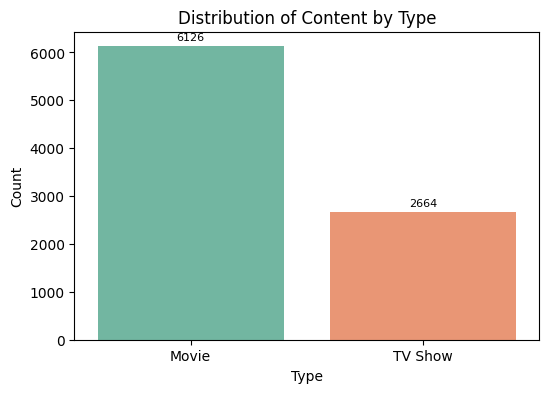

In [4]:
# Plot the distribution
plt.figure(figsize=(6, 4))

# for label (numbering) 
ax = sns.barplot(x = type_counts.index , y = type_counts.values , palette = "Set1")
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=8)
    
sns.barplot(x = type_counts.index, y = type_counts.values, palette = 'Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

* The graph shows that Netflix has more movies than TV shows.
* There are about 6,126 movies and 2,664 TV shows, which means Netflix mainly focuses on movies compared to TV shows.

### 2. Most Common Genres

In [5]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].str.split(',')
all_genres = [genre.strip() for sublist in data['genres'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)
genre_counts

International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

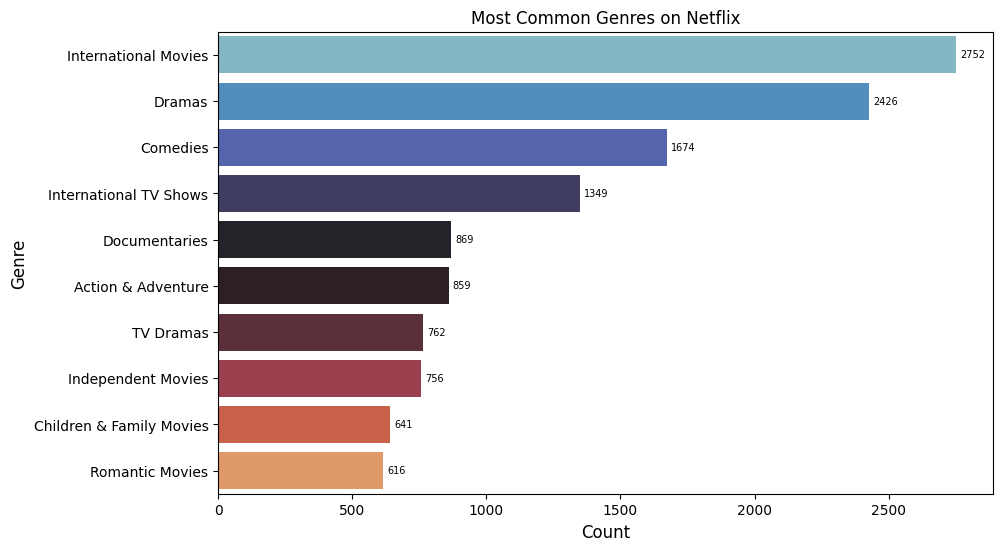

In [6]:
# Plot the most common genres
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='icefire')

# for label and title 
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=7)
    
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Genre', fontsize = 12)
plt.show()

• The graph shows that International Movies are the most popular genre on Netflix,
followed by Dramas and Comedies, indicating that Netflix focuses heavily on international and drama-based content.

### 3. Content Added Over Time

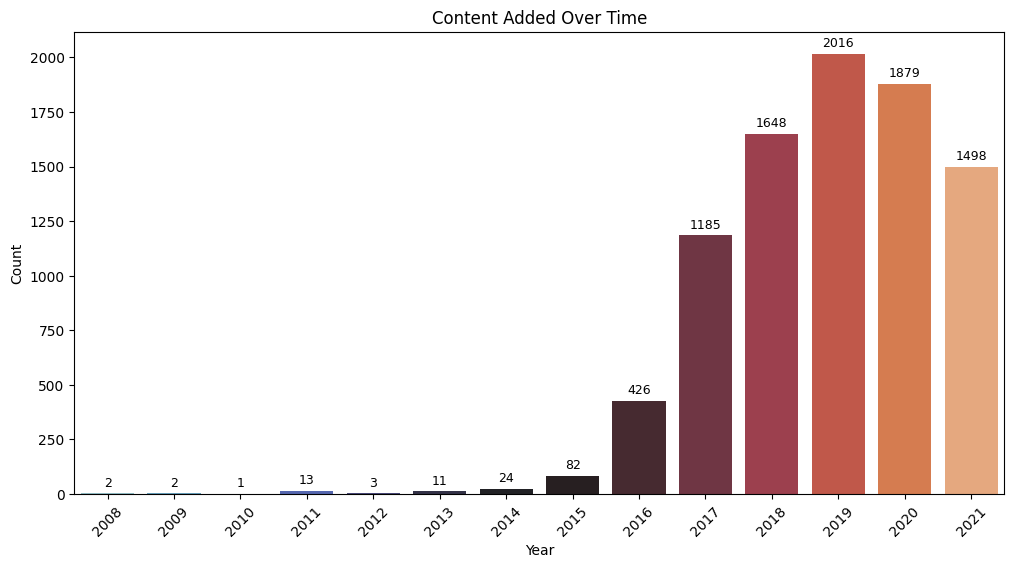

In [7]:
# Plot content added over the years
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='year_added', data=data, palette='icefire')

# add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

• Netflix experienced exponential growth in content additions after 2015, peaking in 2019, followed by a slight decline likely due to production constraints and strategic realignment.

### 4. Top 10 Directors with the Most Titles

In [8]:
# Count titles by director
top_directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:11]
top_directors.head(10)

,director,count
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Martin Scorsese,12
10,Jay Chapman,12


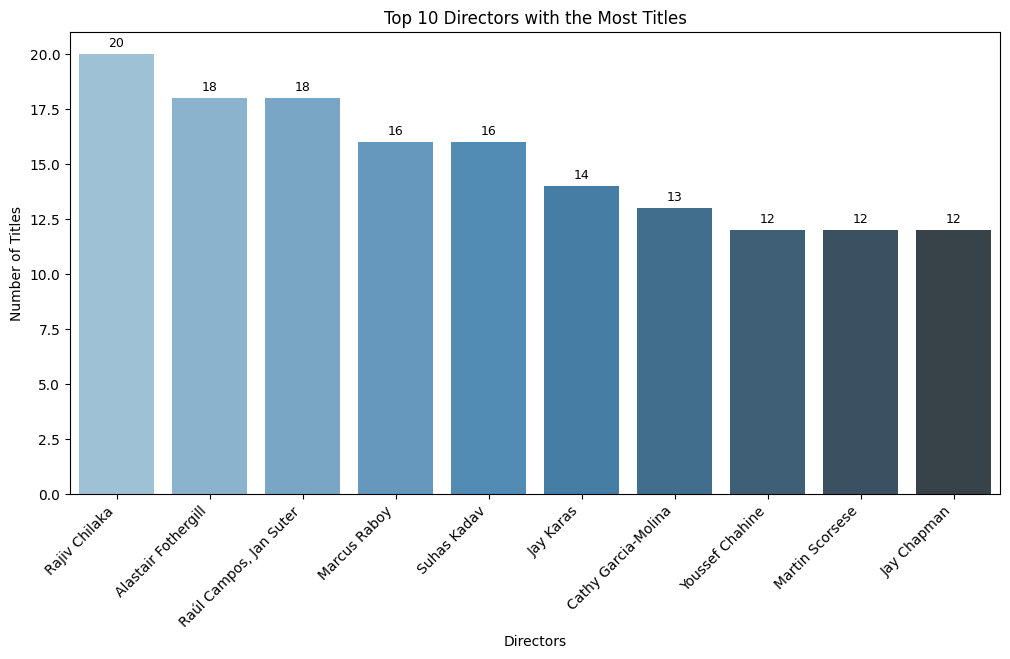

In [9]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_directors['director'], y=top_directors['count'], palette='Blues_d')

# add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Directors')
plt.ylabel('Number of Titles')
plt.show()

• The graph shows that Rajiv Chilaka has the highest number of titles on Netflix,
followed by Alastair Fothergill and Jan Suter, while the remaining directors have slightly lower but comparable counts

### 5. Word Cloud of Movie Titles

In [10]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

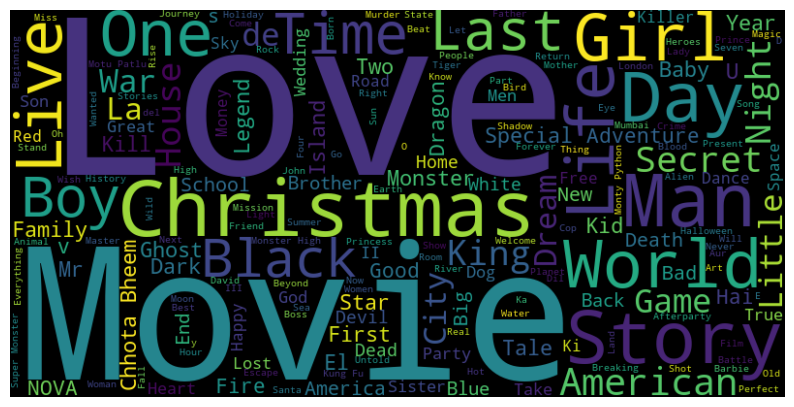

In [11]:
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

• This word cloud represents the most frequent words appearing in Netflix movie titles.
Larger words indicate higher frequency, highlighting common themes such as love, family,
life, and relationships in Netflix’s movie catalog.

### 6. Visual representation of rating frequency of movies and TV Shows on Netflix.

In [12]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

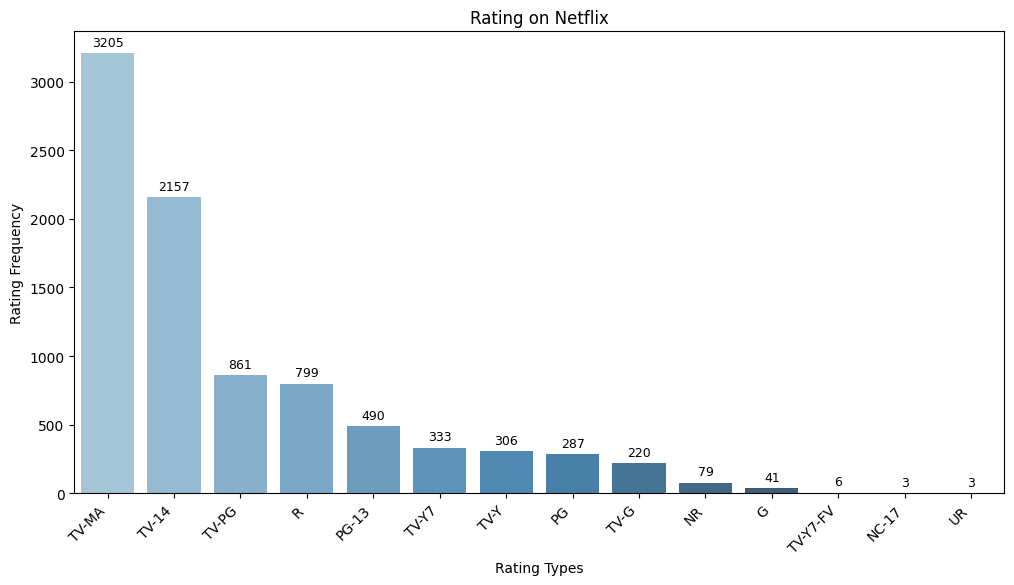

In [13]:
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=ratings['rating'], y=ratings['count'], palette='Blues_d')

# add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.title('Rating on Netflix')
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')
plt.show()

• This bar chart shows the distribution of content ratings on Netflix.  
TV-MA and TV-14 dominate the platform, indicating a strong focus on mature and teenage audiences.  
Family-friendly ratings such as G, TV-Y, and TV-Y7-FV have significantly lower representation, suggesting Netflix prioritizes adult-oriented content over children’s programming.

### 7. Top 10 countries with most content on Netflix

In [14]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
top_ten_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


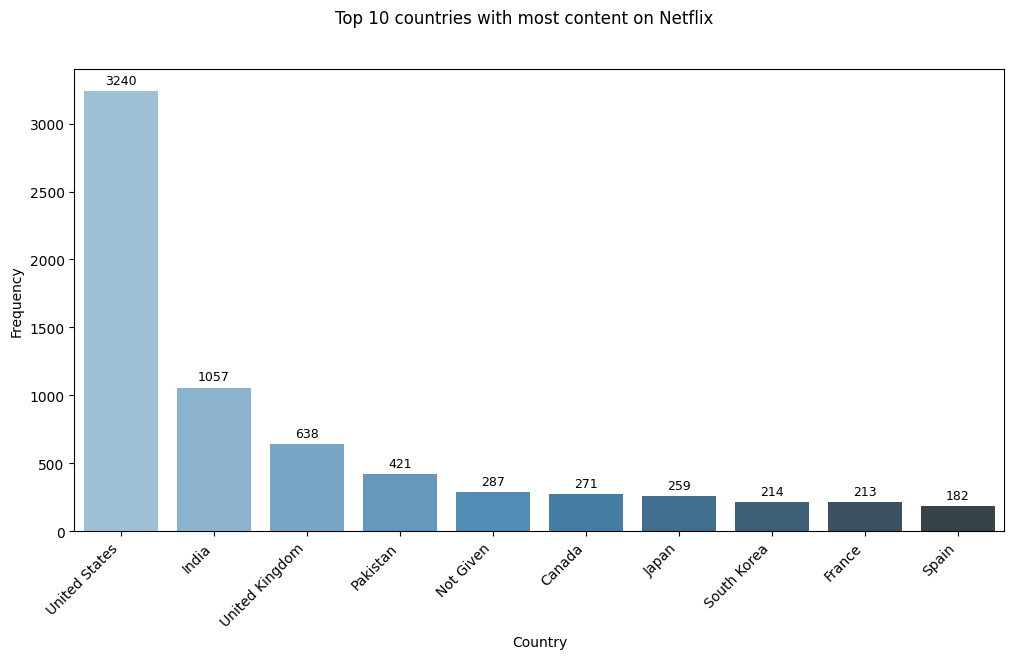

In [15]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_ten_countries['country'], y=top_ten_countries['count'], palette='Blues_d')

# add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.xticks(rotation=45,ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

• This bar chart highlights the top 10 countries contributing the most content on Netflix.  
• The United States leads by a large margin, followed by India and the United Kingdom, indicating Netflix’s strong focus on North American and international markets.  
• Emerging contributions from countries like Japan, South Korea, and France reflect Netflix’s growing global content strategy.

### 8. Monthly releases of Movies and TV shows on Netflix

In [16]:
# count monthely release movies and tv shows
monthly_mv = pd.DataFrame(data[data['type']=='Movie']['month_name'].value_counts().sort_index())
monthly_sr = pd.DataFrame(data[data['type']=='TV Show']['month_name'].value_counts().sort_index())
monthly_combined = pd.concat([monthly_mv, monthly_sr],axis=1,keys=['Movies', 'TV Shows'])
monthly_combined

,Movies,TV Shows
,count,count
month_name,,
April,410,194
August,380,189
December,452,229
February,457,174
January,1901,606
July,393,175
June,388,211
March,353,193


In [17]:
# Monthly releases of Movies and TV Shows on Netflix
monthly_movie_release = (data[data['type'] == 'Movie']['month_added'].value_counts().sort_index())
monthly_series_release = (data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index())

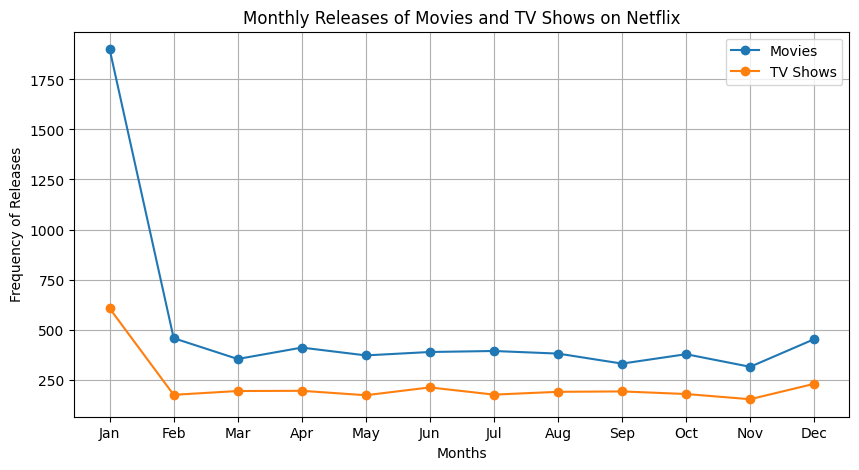

In [18]:
plt.figure(figsize=(10, 5))

plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker="o")
plt.plot(monthly_series_release.index, monthly_series_release.values, label='TV Shows', marker="o")

plt.xlabel("Months")
plt.ylabel("Frequency of Releases")
plt.xticks(range(1, 13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.title("Monthly Releases of Movies and TV Shows on Netflix")
plt.legend()
plt.grid(True)
plt.show()

• January has the highest number of releases, especially Movies.

• Movies are released more frequently than TV Shows in all months.

• There is a sharp drop in releases after January.

• Content releases remain stable from March to October.

• Mid-year months show consistent content addition.

• December shows an increase due to holiday season releases.

### 9. Yearly releases of Movies and TV Shows on Netflix

In [19]:
yearly_movie_releases = data[data['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_releases = data[data['type']=='TV Show']['year_added'].value_counts().sort_index()

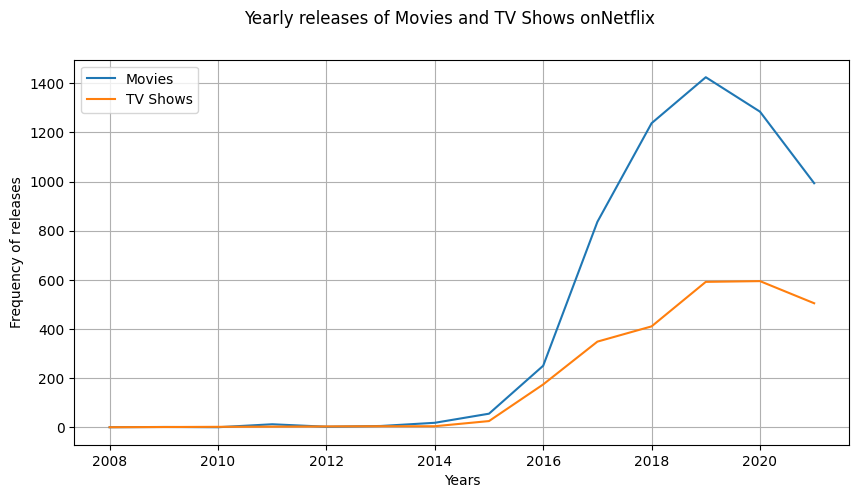

In [20]:
plt.figure(figsize=(10, 5))

plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')

plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows onNetflix")
plt.legend()

• Netflix content releases increased rapidly after 2015.

• Movies consistently outnumber TV Shows every year.

• Peak content release occurred around 2019.

• TV Shows show steady growth but at a slower rate than Movies.

• Slight decline in releases observed after 2020.

• Overall trend indicates aggressive content expansion by Netflix.

### 10. Top 10 popular movie genres

In [21]:
popular_movie_genre = data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

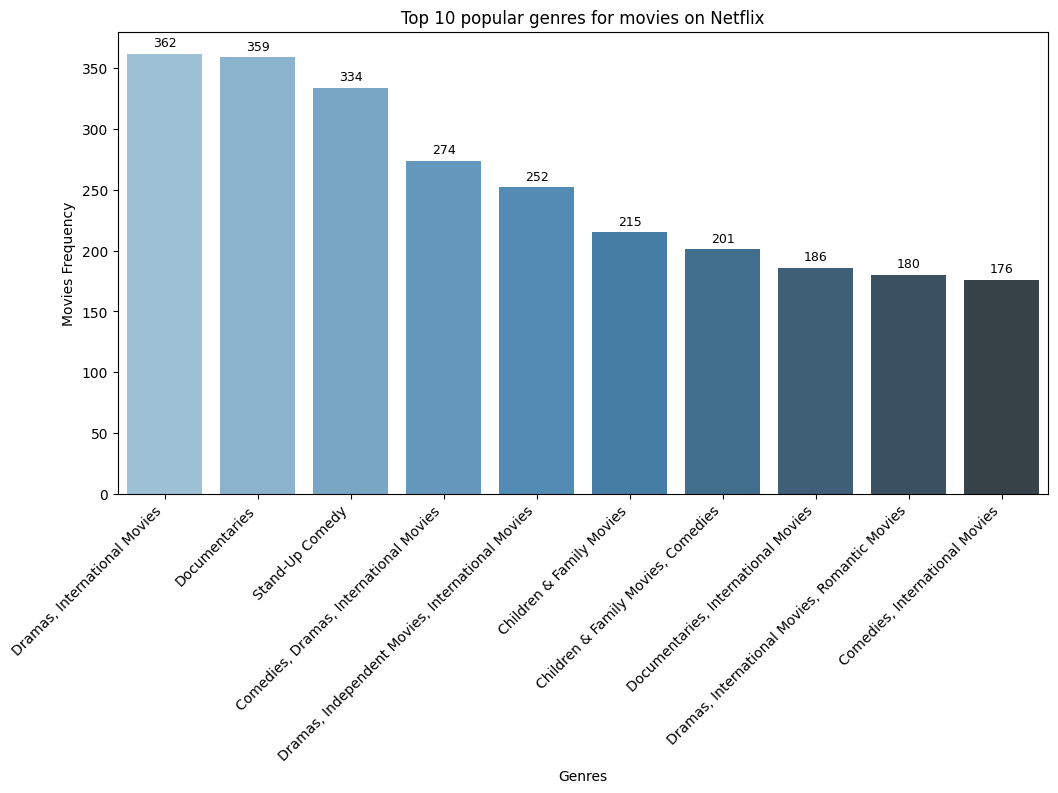

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, palette='Blues_d')

# add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 popular genres for movies on Netflix')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.show()

• Dramas and International Movies are the most popular genres on Netflix.
    
• Documentaries have very high representation among movies.
    
• Stand-Up Comedy is one of the top content categories.
    
• International content dominates multiple top genres.
    
• Family and Children-focused movies have moderate popularity.
    
• Comedy-based genres appear frequently across the top 10 list.
    
• Netflix focuses strongly on diverse and global movie content.

### 11. Top 10 TV Shows genres

In [23]:
popular_series_genre = data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

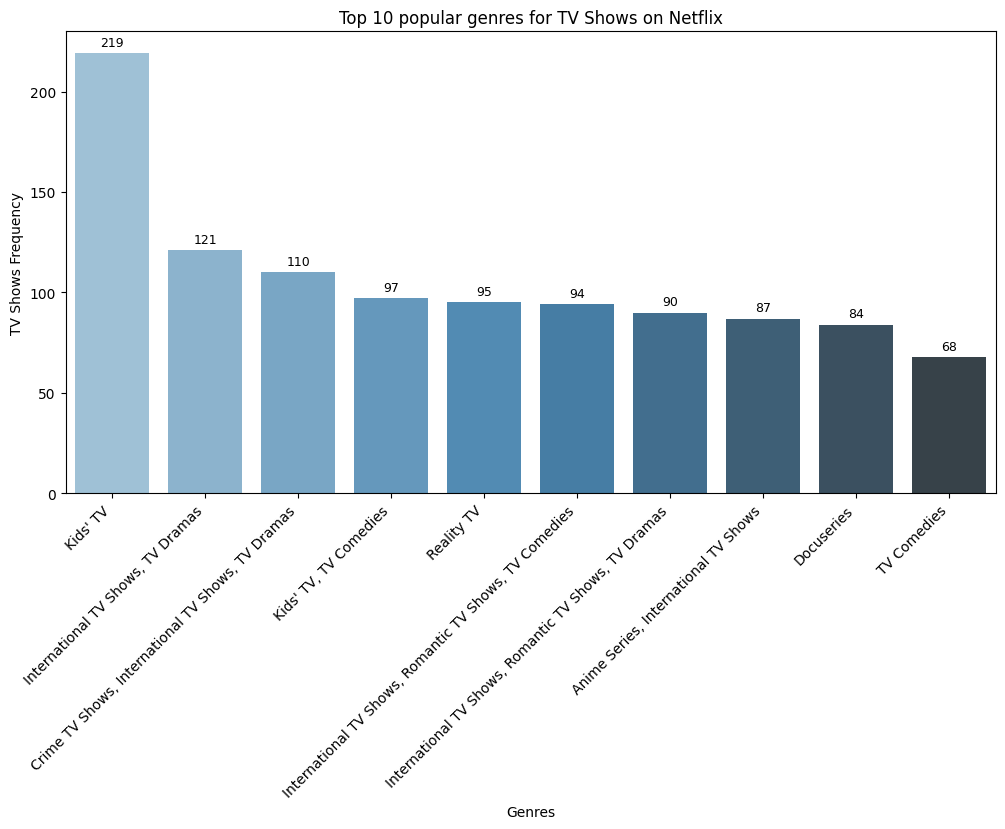

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, palette='Blues_d')

# add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 popular genres for TV Shows on Netflix')
plt.xlabel('Genres')
plt.ylabel('TV Shows Frequency')
plt.show()

• Kids’ TV is the most popular genre among TV shows on Netflix.

• International TV Shows and TV Dramas have strong representation.

• Crime and Romantic TV dramas are major content categories.

• Reality TV maintains steady popularity on the platform.

• Comedy-based TV shows appear frequently in the top genres.

• Anime and International TV shows show growing audience interest.

• Netflix focuses on diverse and family-friendly TV content.

### 12. Top 15 directors across Netflix with high frequency of movies and shows.

In [25]:
directors = data['director'].value_counts().head(15).reset_index()[1:15]
directors.columns = ['director', 'count']

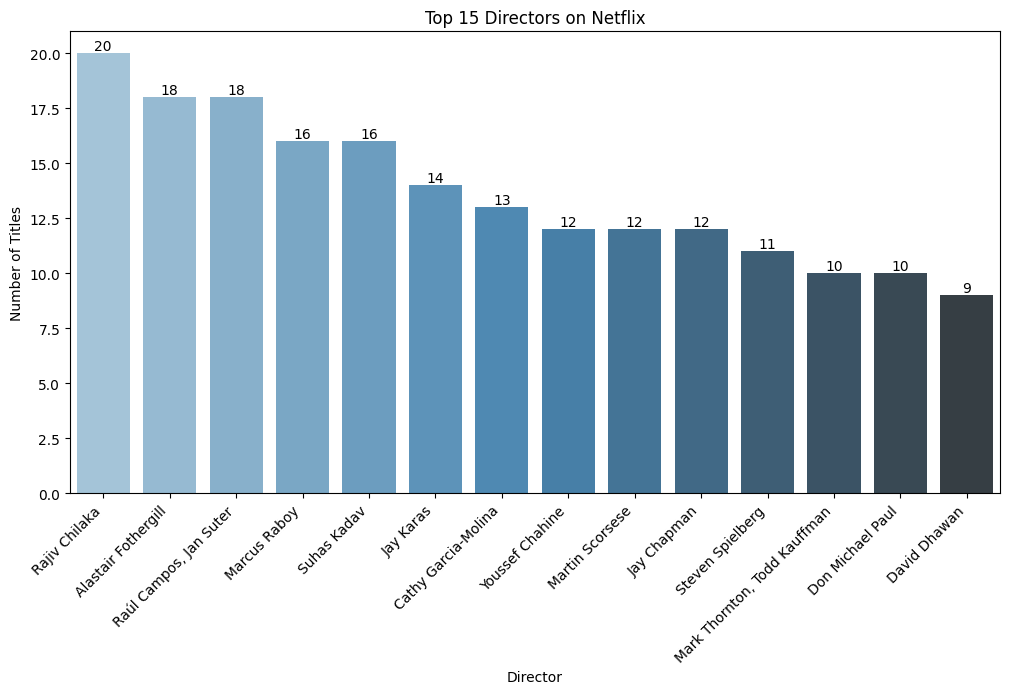

In [26]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=directors, x='director', y='count', palette='Blues_d')

# value labels
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.show()

• Rajiv Chilaka is the most frequent director on Netflix with 20 titles, indicating strong content contribution.
    
• Alastair Fothergill and Raúl Campos Jan Suter closely follow with 18 titles each.
    
• The top 5 directors have a very similar number of titles, showing a competitive distribution rather than dominance by one creator.
    
• Most directors in the top 15 have between 10–16 titles, suggesting Netflix collaborates repeatedly with a limited set of trusted directors.

• Presence of both Indian and international directors highlights Netflix’s global content strategy.

• The gradual decline in bar heights indicates a long-tail distribution where a few directors contribute more content than others.